In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [37]:
df=  pd.read_csv("../data/data.csv")

In [38]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


In [16]:
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_disp_prov', 'koi_comment', 'koi_period', 'koi_time0bk',
       'koi_time0', 'koi_eccen', 'koi_longp', 'koi_impact', 'koi_duration',
       'koi_ingress', 'koi_depth', 'koi_ror', 'koi_srho', 'koi_fittype',
       'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_dor',
       'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3',
       'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_parm_prov', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters',
       'koi_bin_oedp_sig', 'koi_trans_mod', 'koi_model_dof', 'koi_model_chisq',
       'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_steff', 'koi_slogg',
       'koi_smet', 'koi_srad', 'koi_smass', 'koi_s

In [17]:
# Check for duplicates
df.duplicated().sum()

0

In [39]:
df.drop(columns = ['kepid'
                  , 'kepoi_name'
                  , 'kepler_name'
                  , 'koi_score'
                  , 'koi_fpflag_nt'
                  , 'koi_fpflag_ss'
                  , 'koi_fpflag_co'
                  , 'koi_fpflag_ec'
                  , 'koi_vet_stat'
                  , 'koi_vet_date'
                  , 'koi_disp_prov'
                  , 'koi_comment'
                  , 'koi_parm_prov'
                  , 'koi_tce_delivname'
                  , 'koi_trans_mod'
                  , 'koi_datalink_dvr'
                  , 'koi_datalink_dvs'
                  , 'koi_sparprov'
                  , 'koi_fittype'
                  ], inplace=True)

In [40]:
# Check for missing values
df.isnull().sum() 

rowid                 0
koi_disposition       0
koi_pdisposition      0
koi_period            0
koi_time0bk           0
                   ... 
koi_dicco_mdec      599
koi_dicco_msky      599
koi_dikco_mra       570
koi_dikco_mdec      570
koi_dikco_msky      570
Length: 64, dtype: int64

In [54]:
# where missing values are higher than 5 percent 
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values / len(df)
missing_values
cols_with_missing = missing_values[missing_values ==1 ].index
cols_with_missing

Index(['koi_longp', 'koi_ingress', 'koi_model_dof', 'koi_model_chisq',
       'koi_sage'],
      dtype='object')

In [55]:
df.drop(cols_with_missing, axis=1, inplace=True)

In [56]:
# impute missing values with mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)


<Axes: >

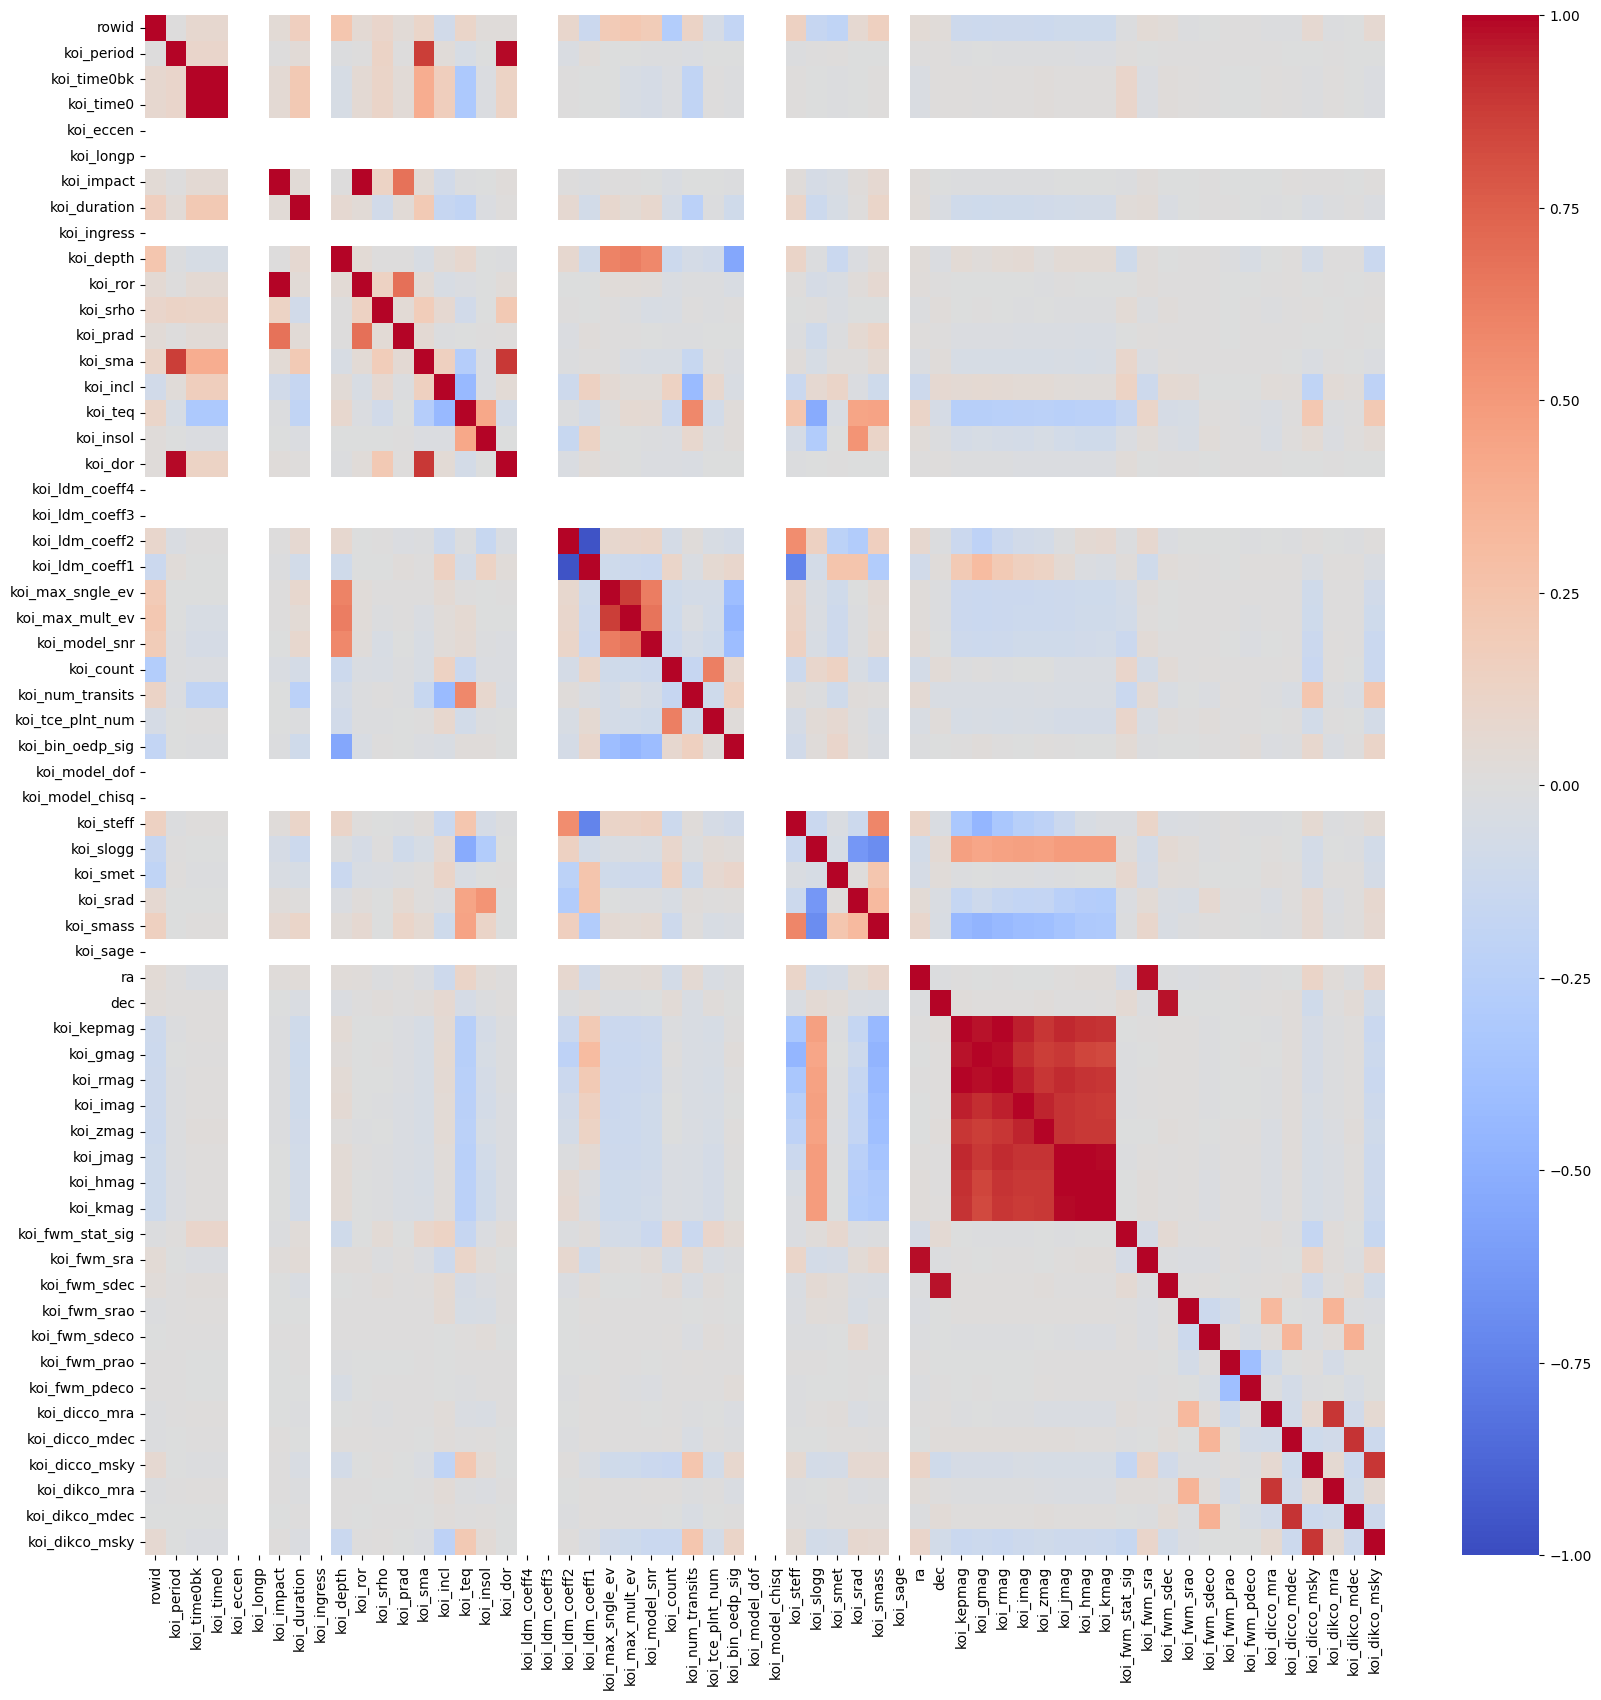

In [43]:
# correlation
# only for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, vmin = -1, cmap='coolwarm')

<Axes: >

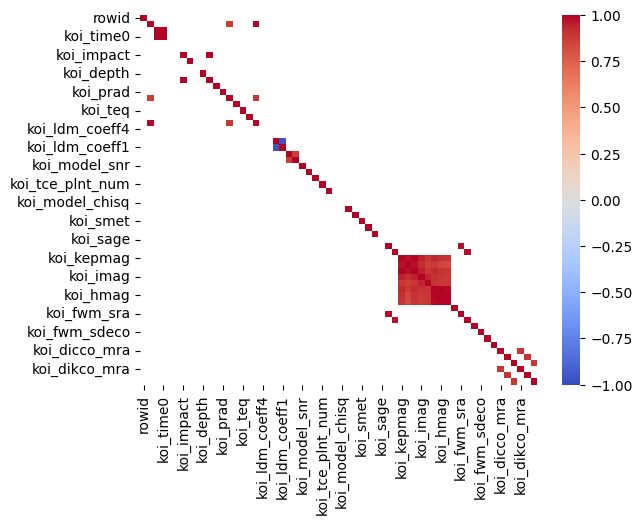

In [45]:
# high and low correlation
high = correlation[abs(correlation) > 0.8]
sns.heatmap(high, vmax=1, vmin = -1, cmap='coolwarm')

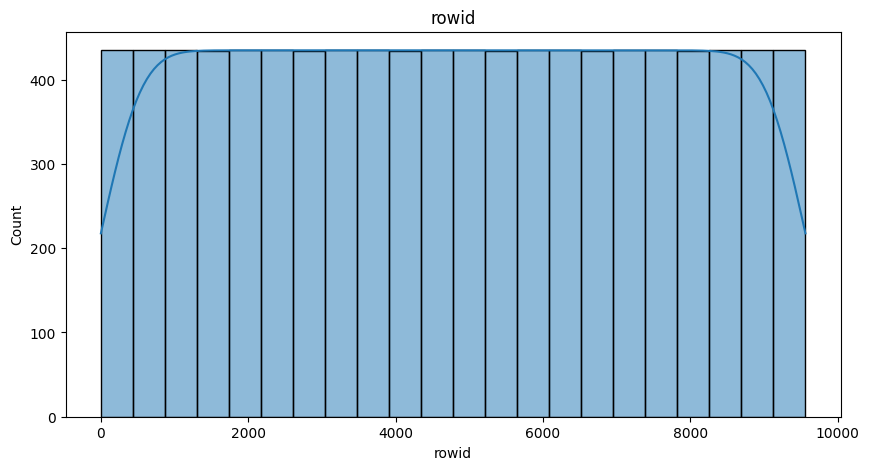

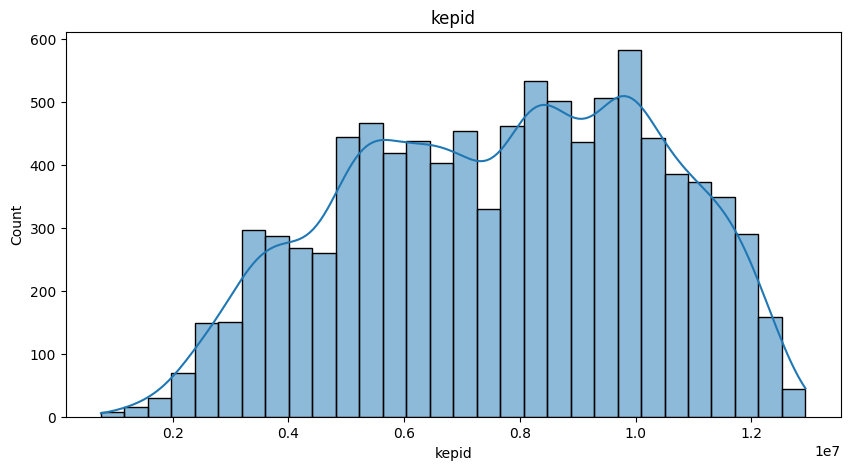

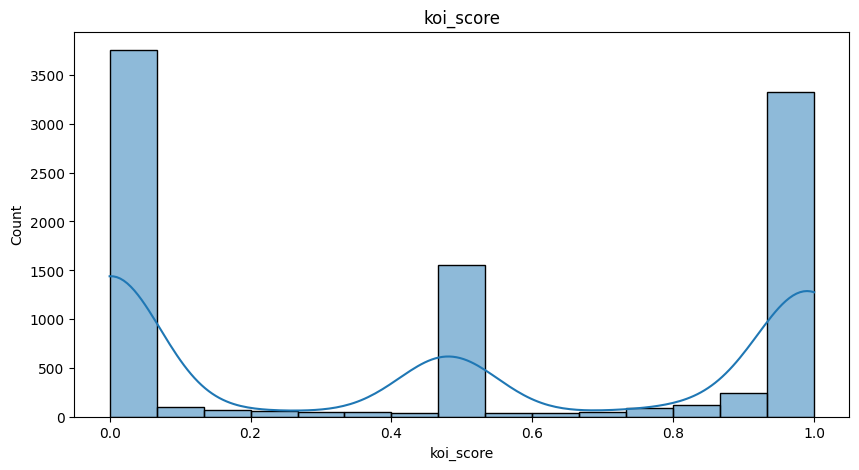

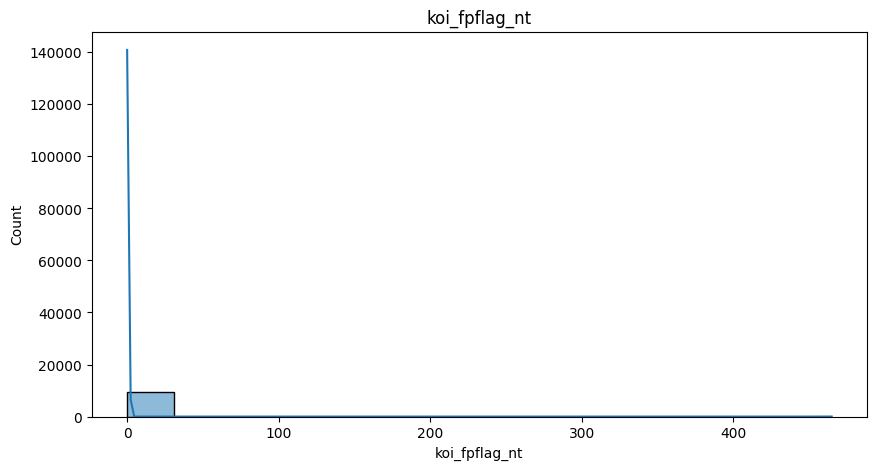

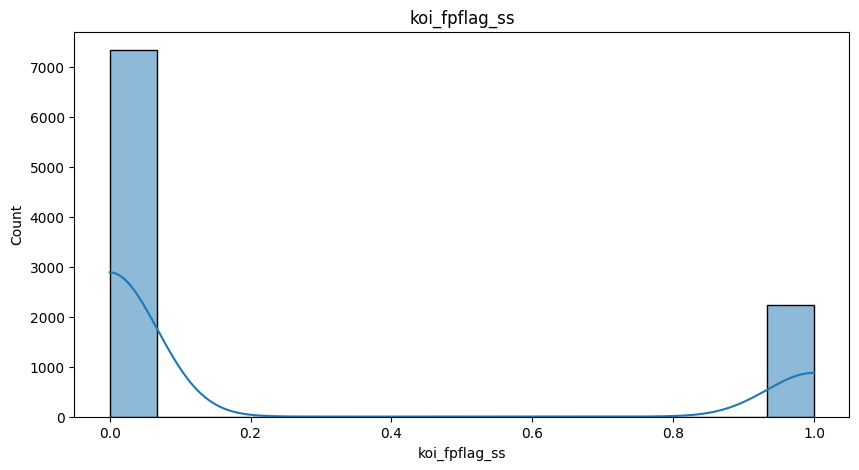

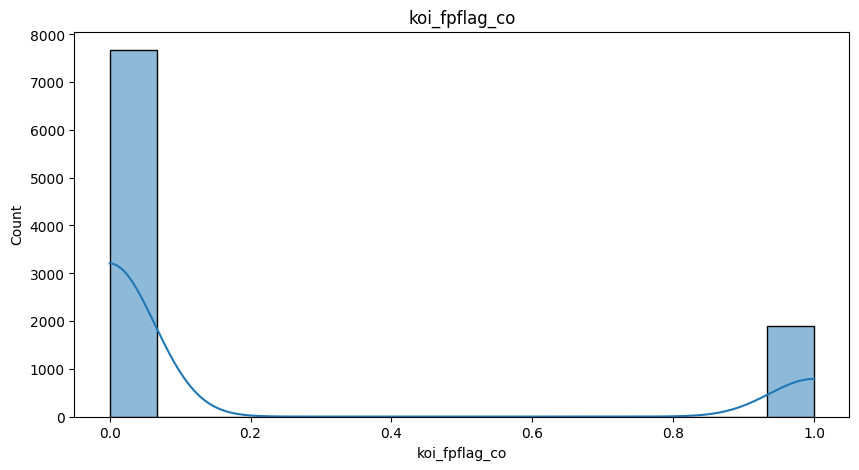

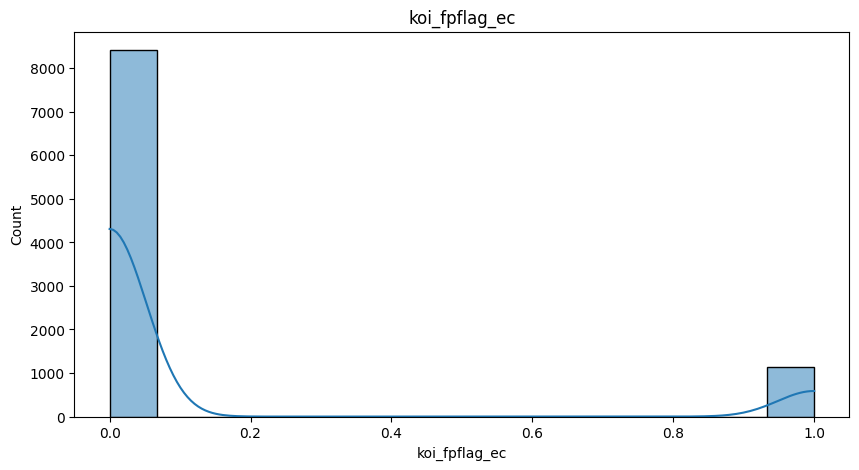

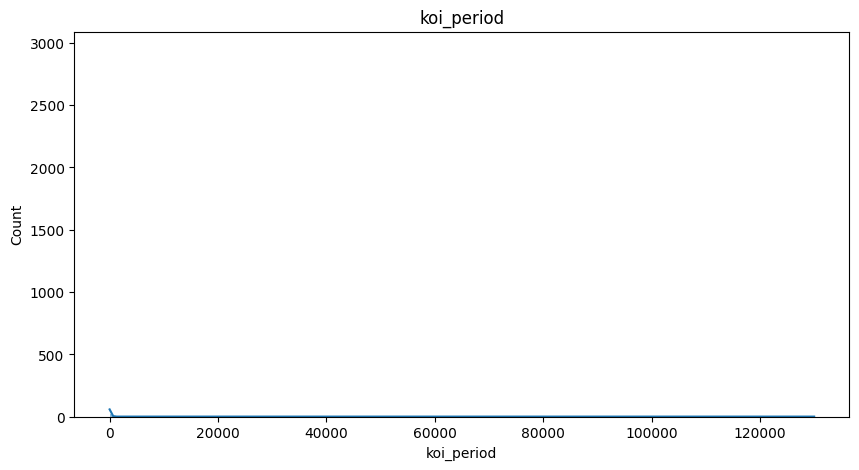

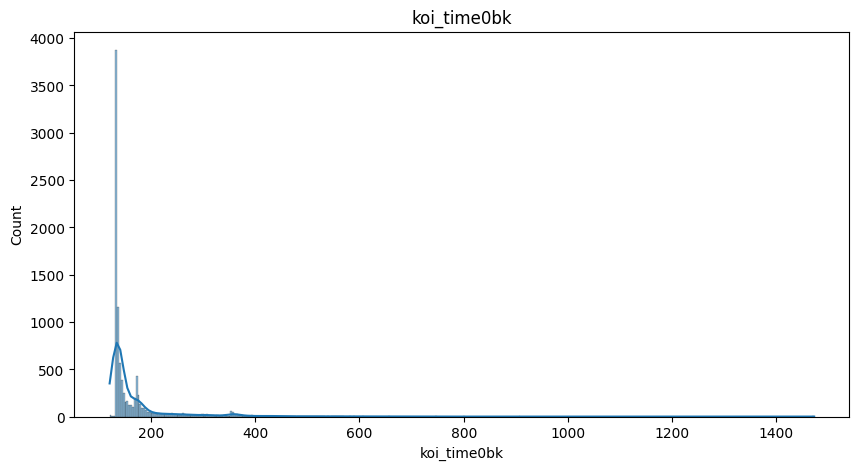

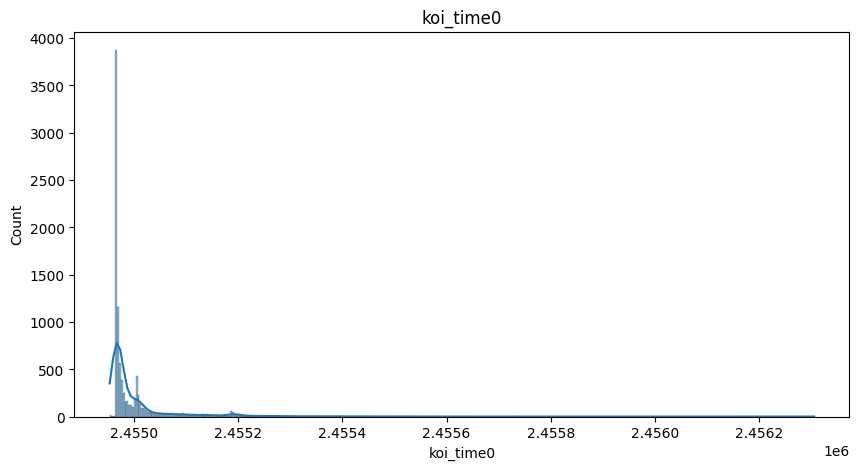

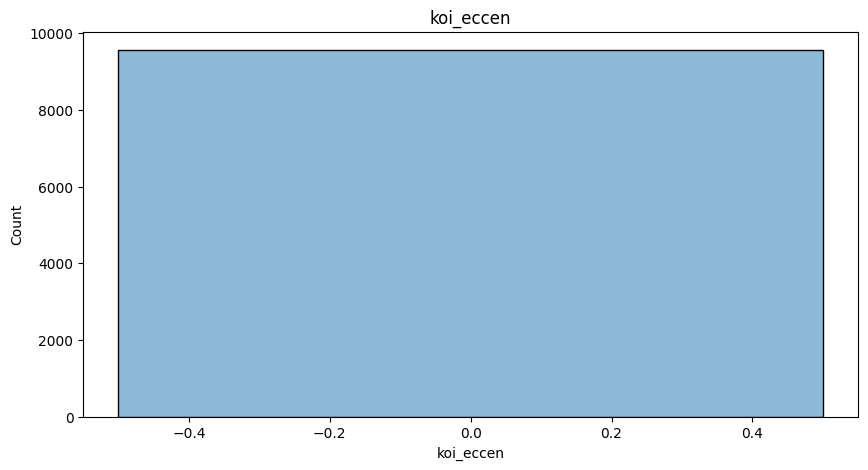

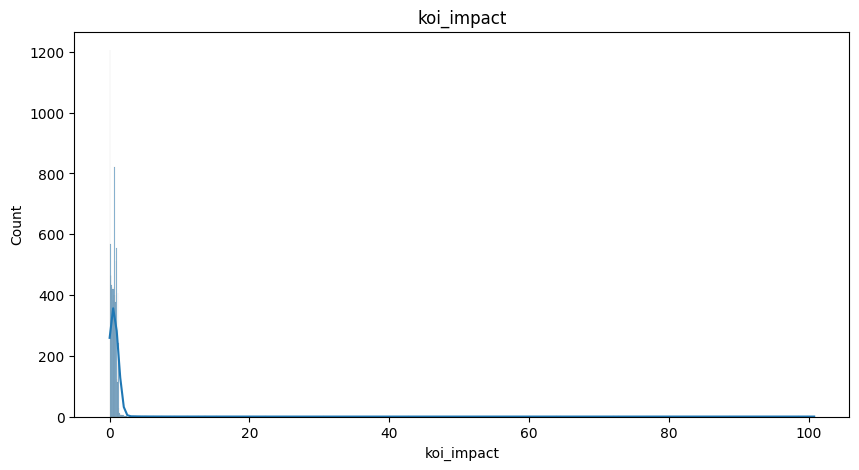

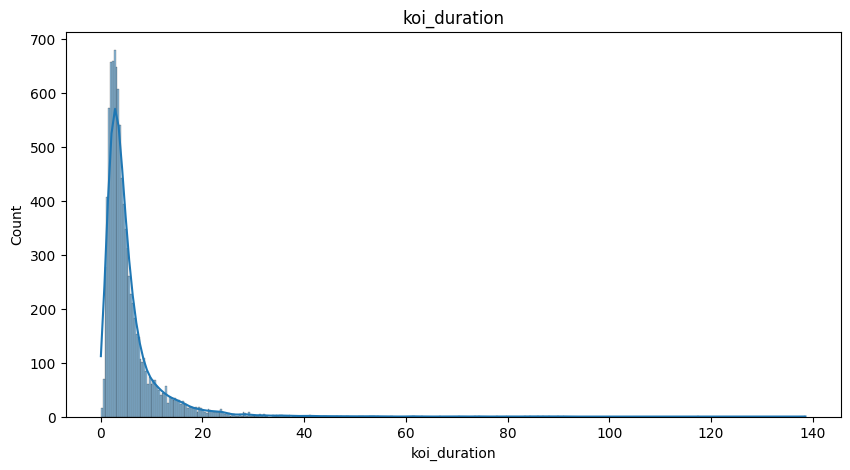

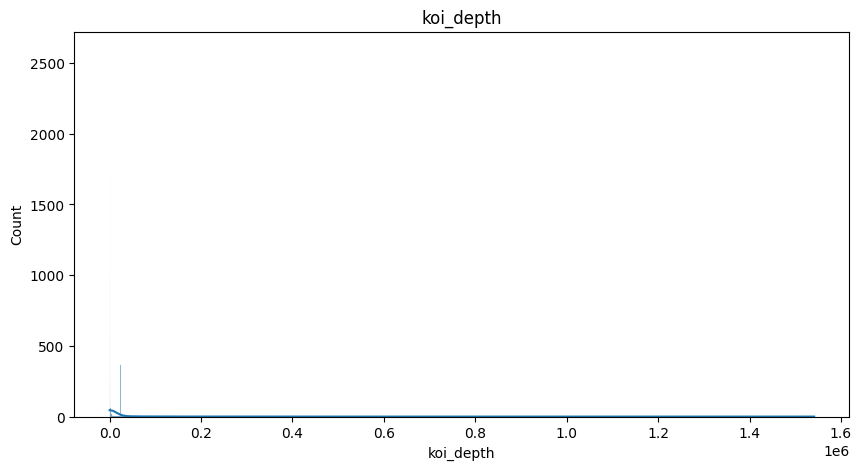

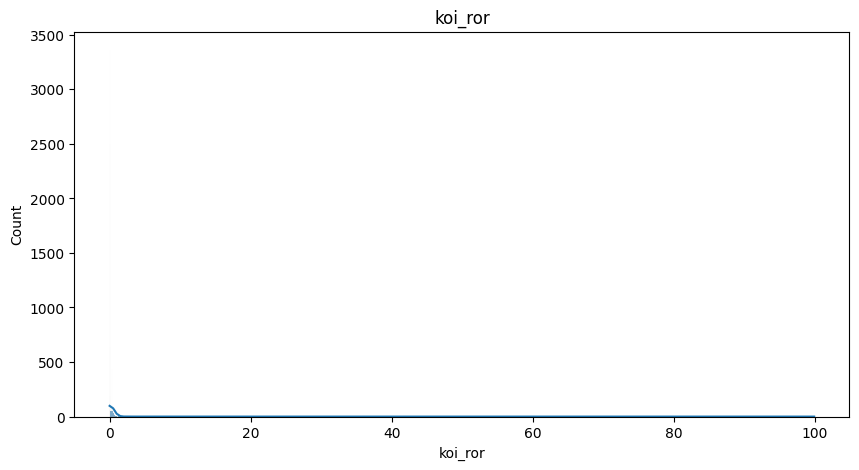

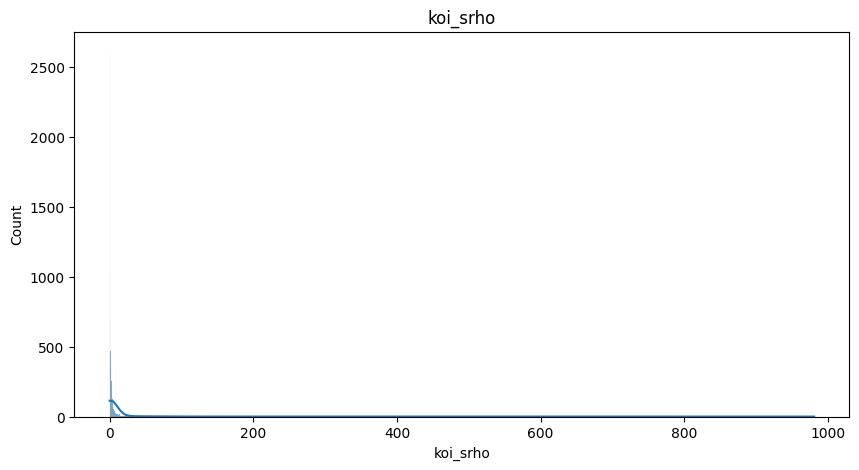

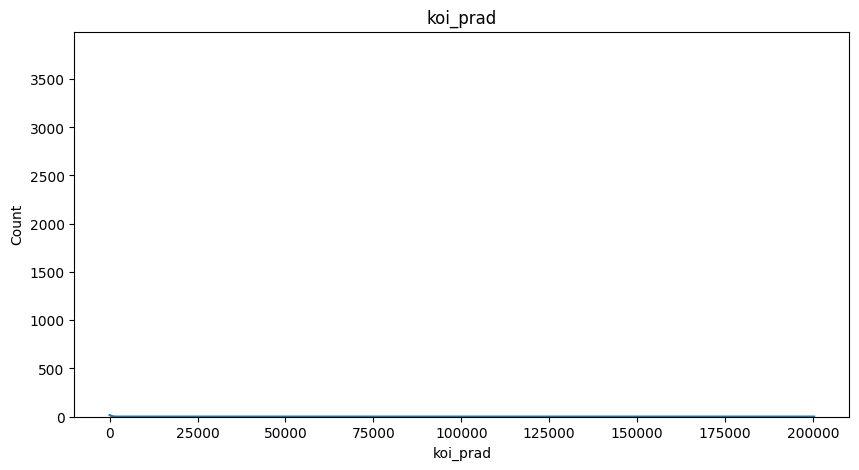

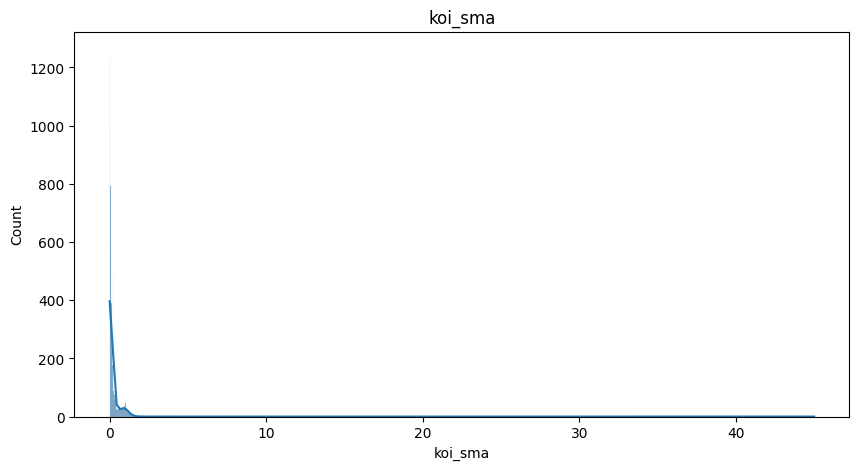

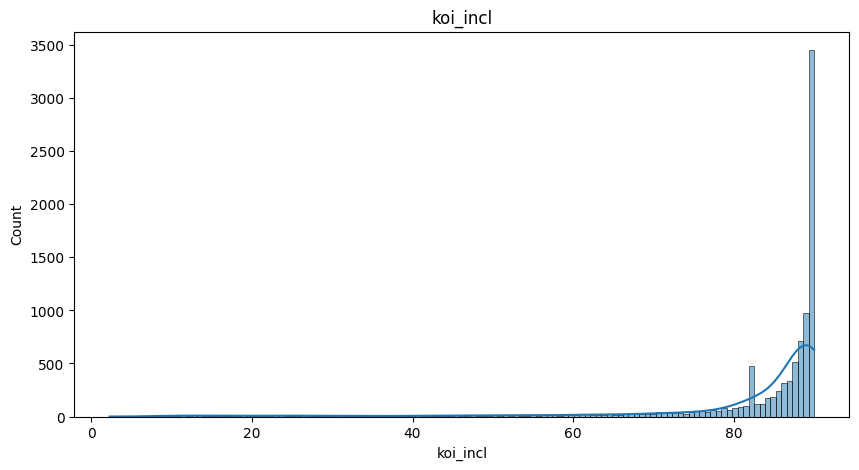

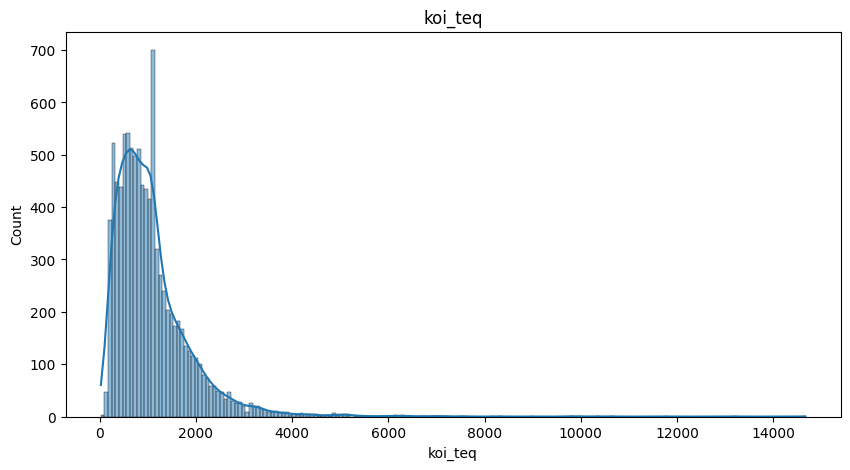

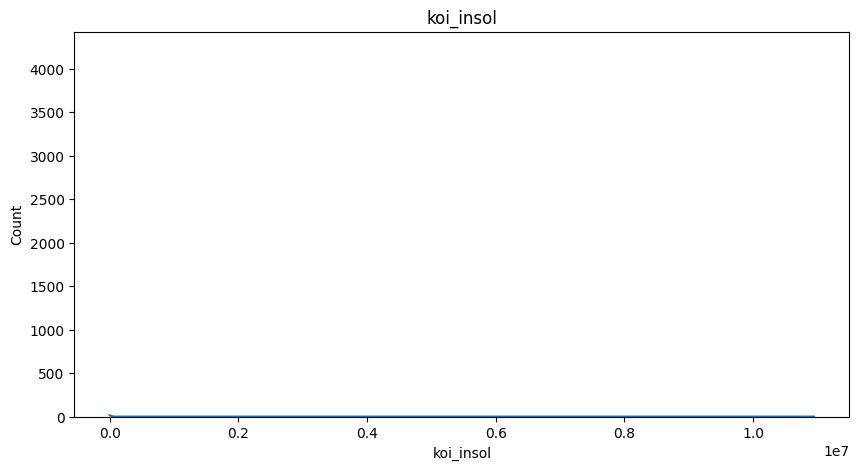

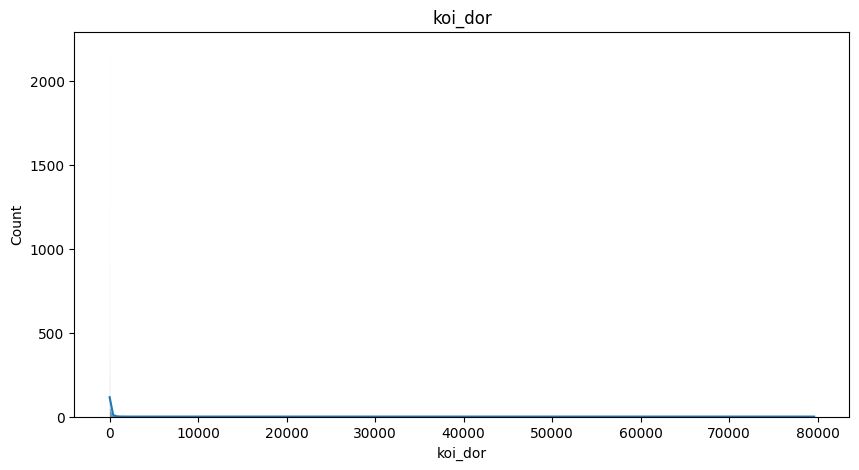

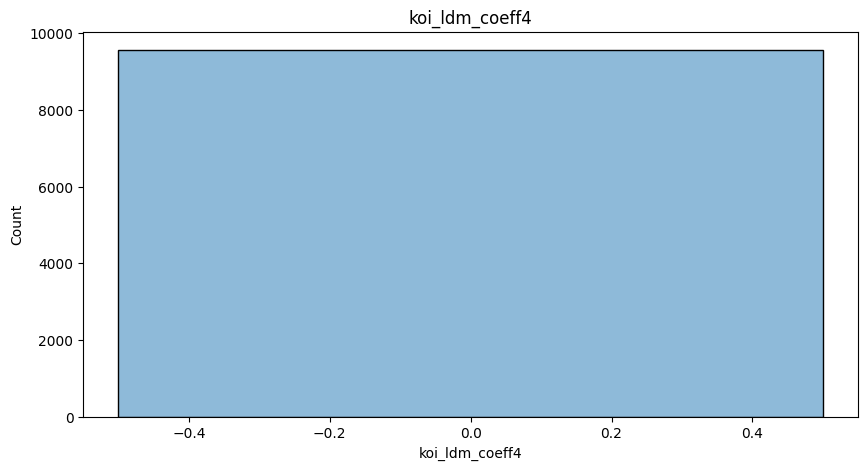

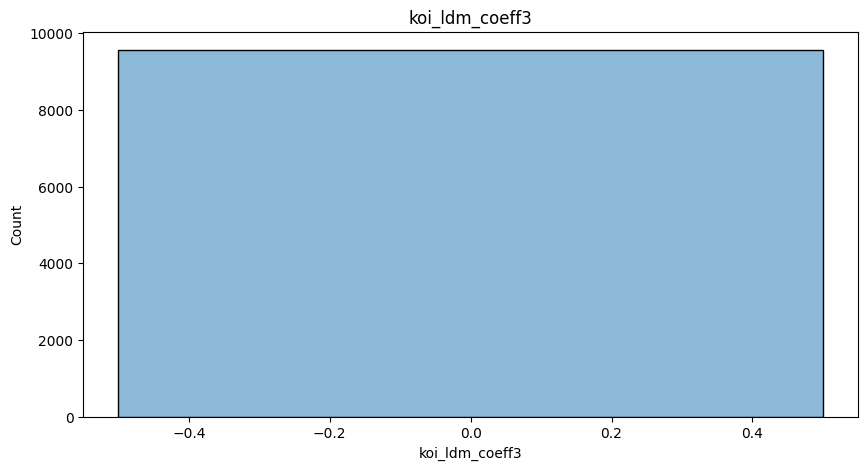

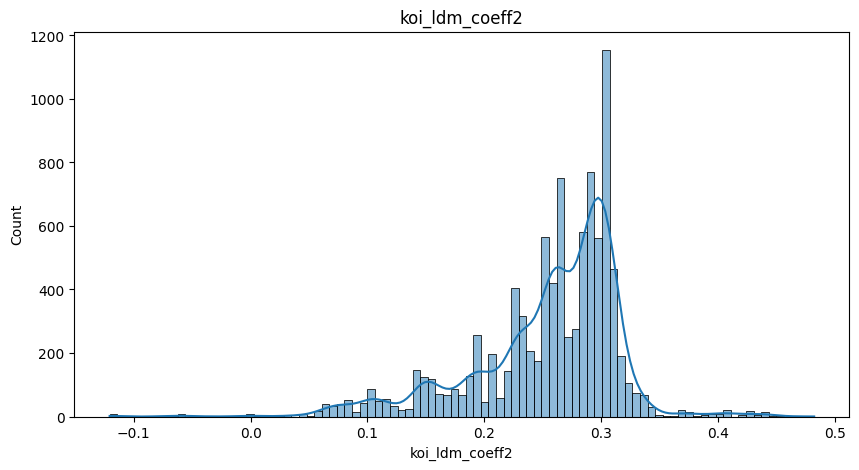

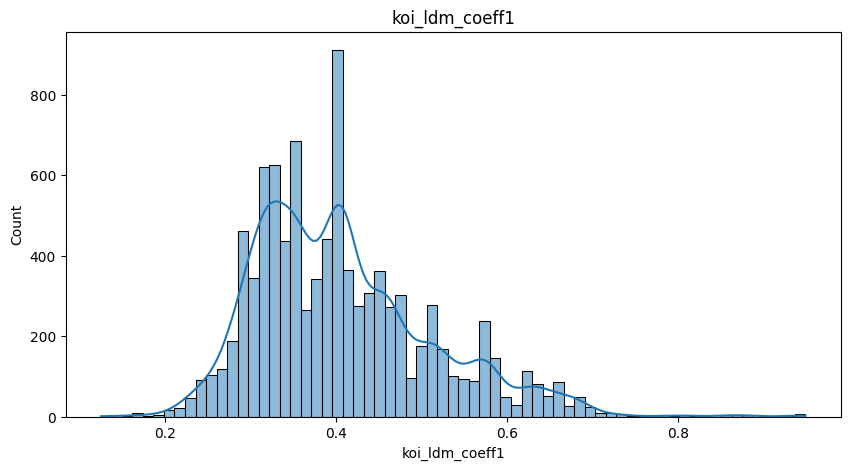

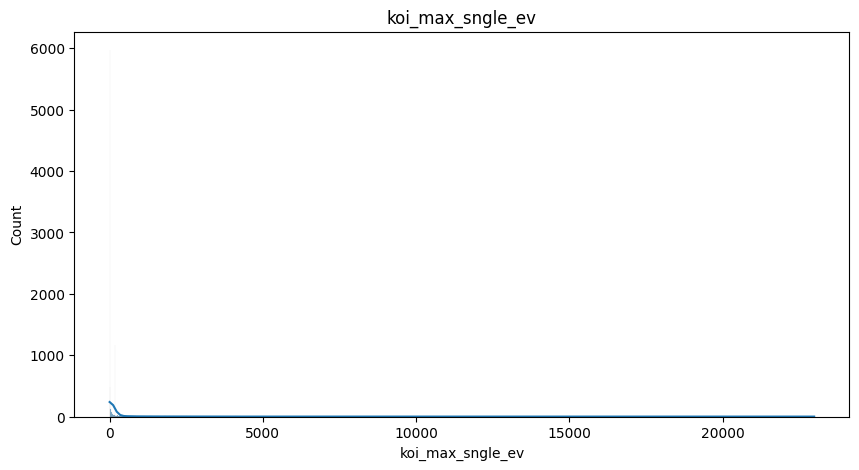

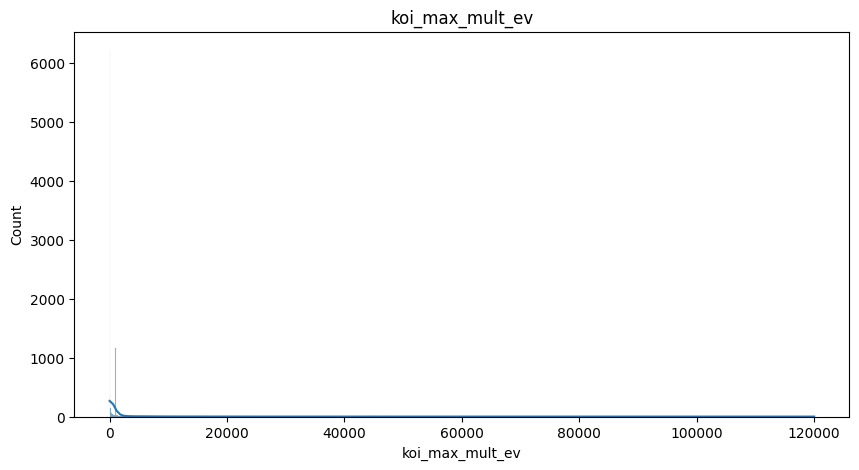

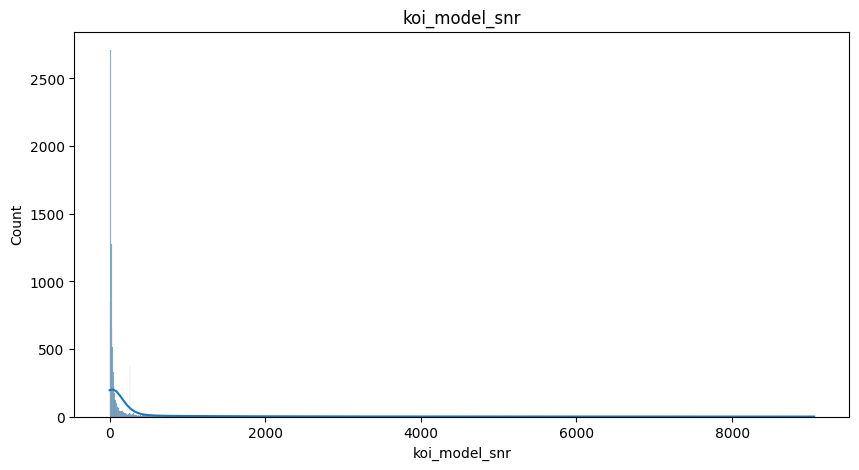

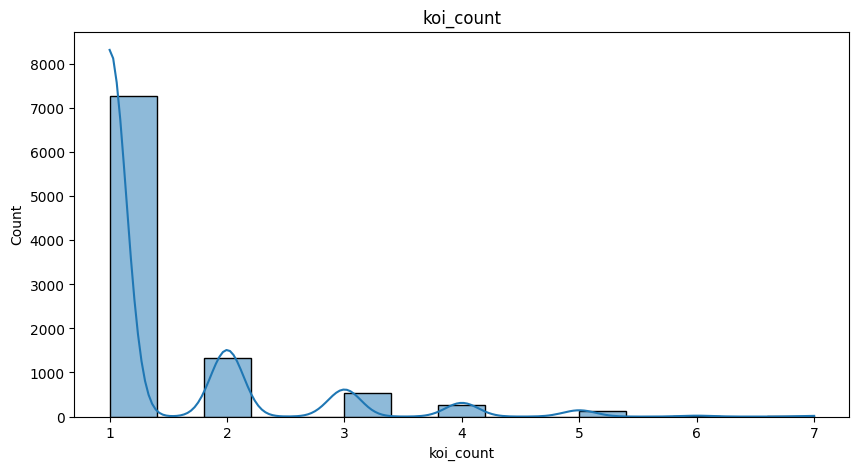

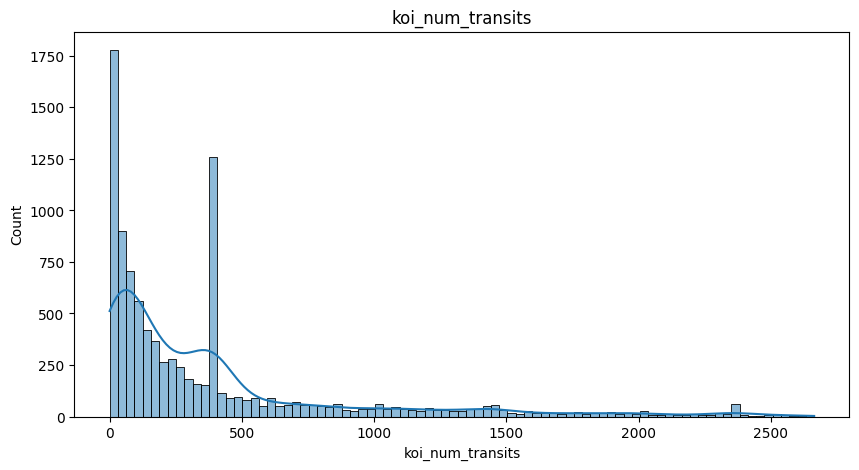

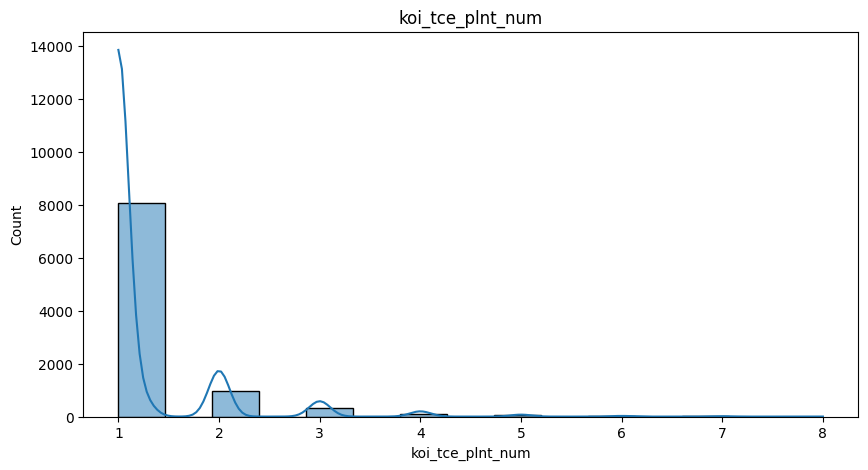

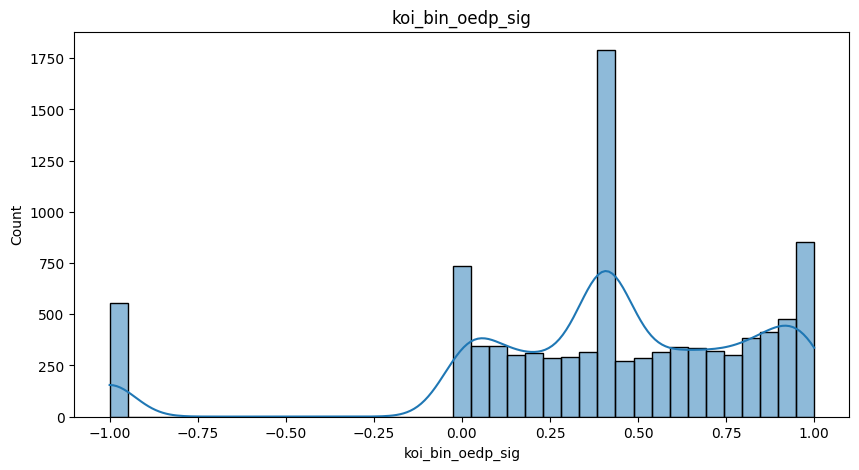

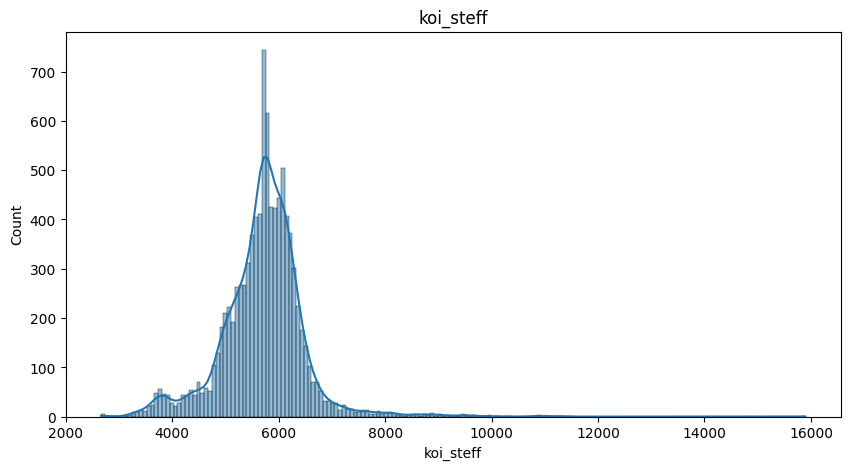

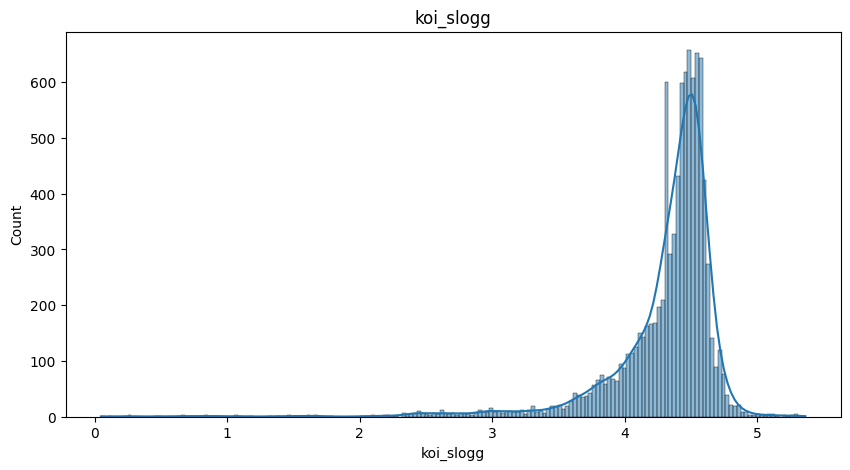

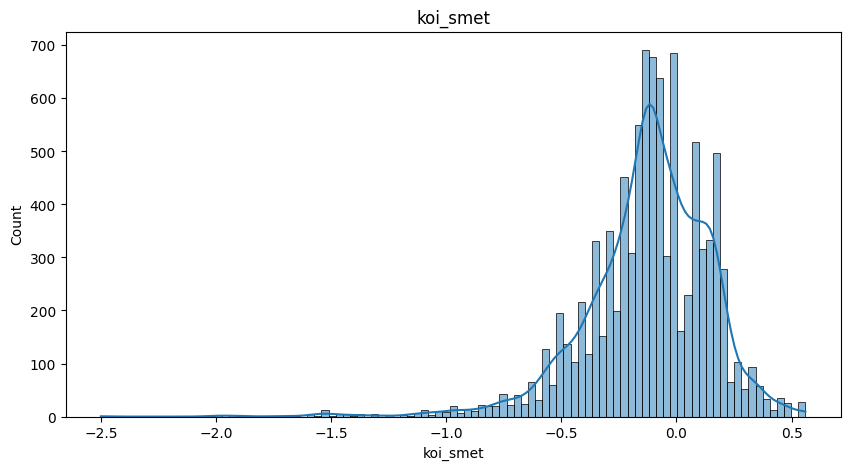

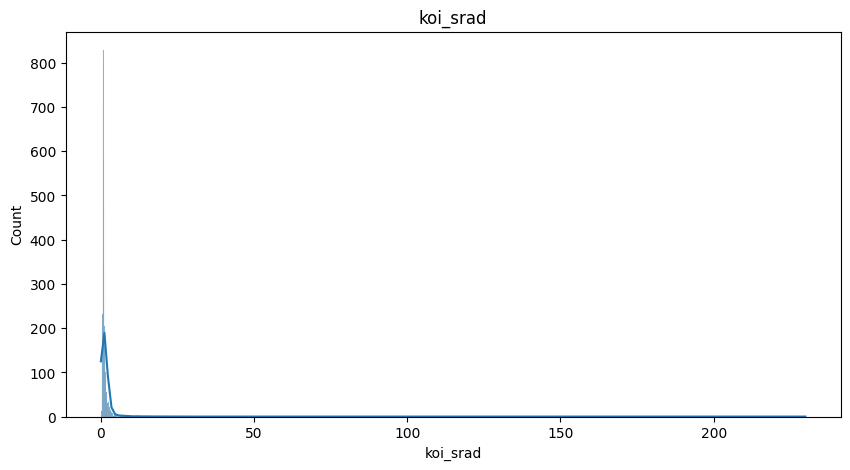

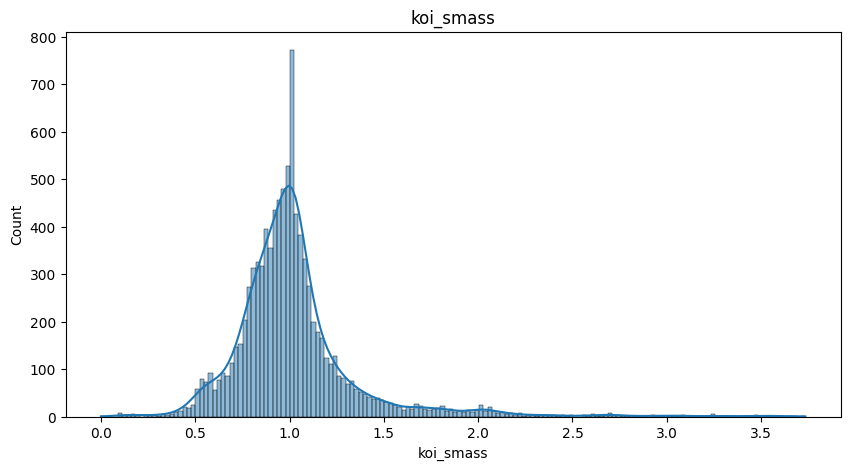

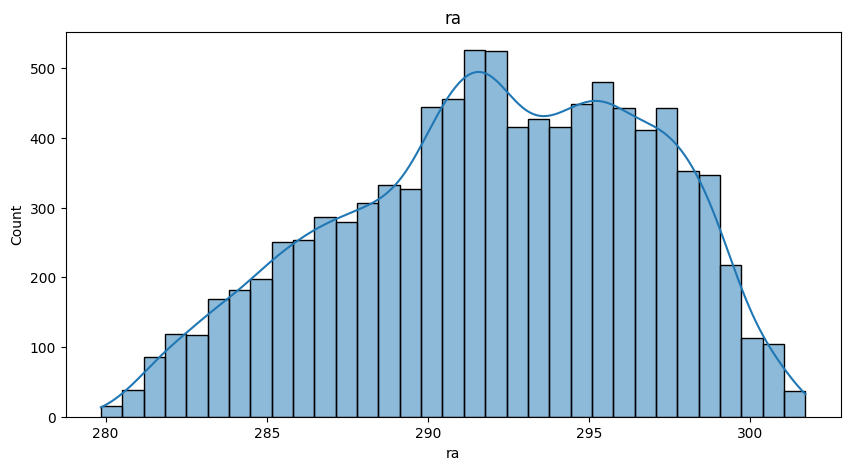

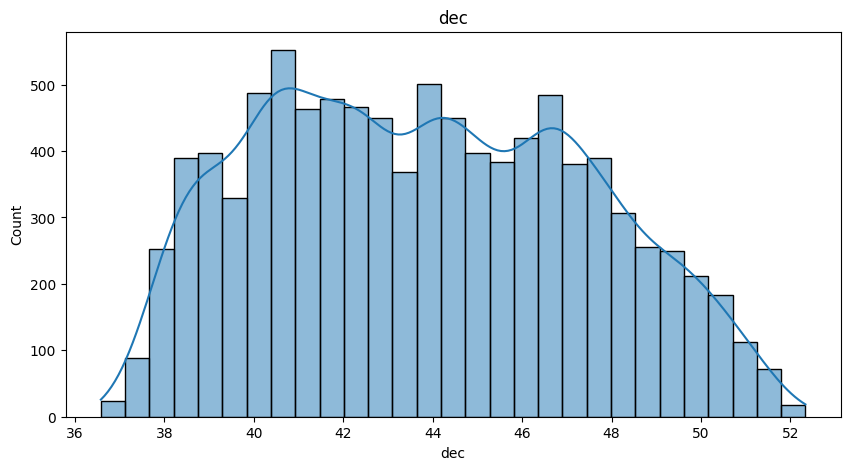

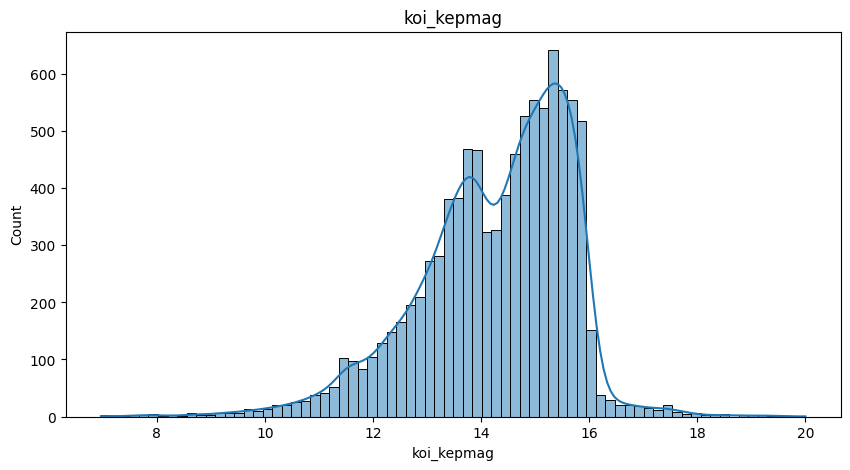

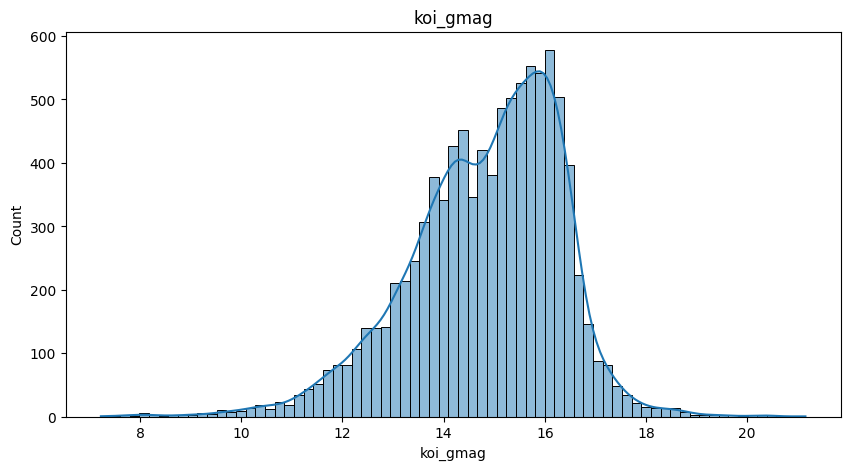

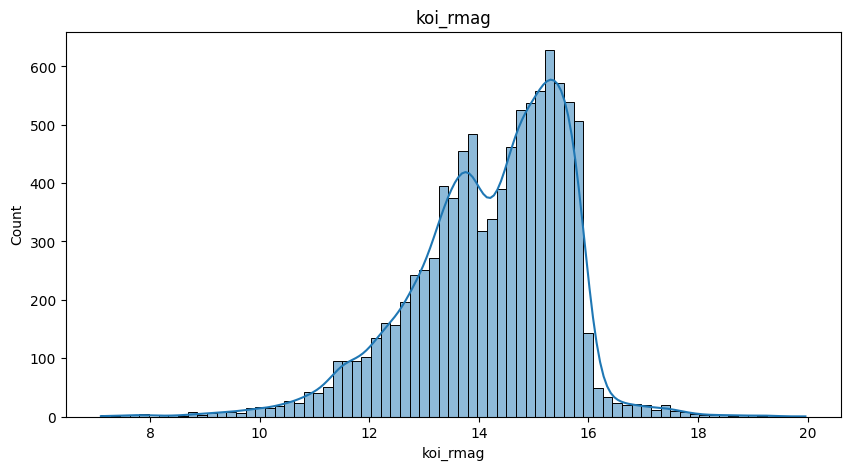

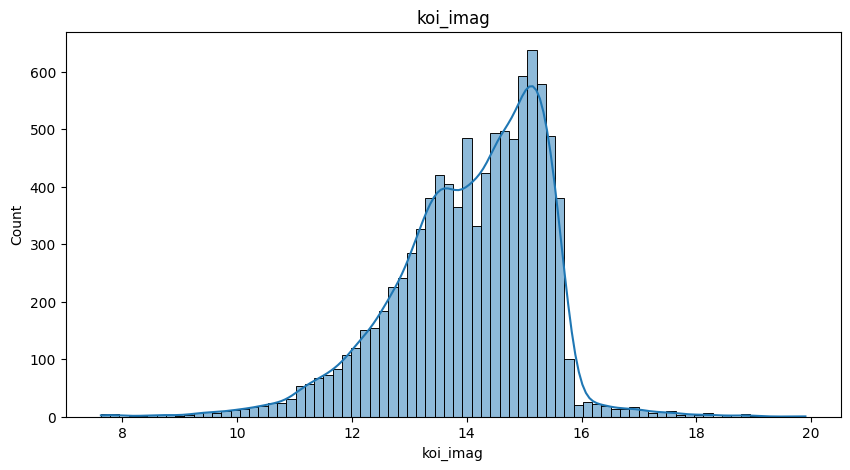

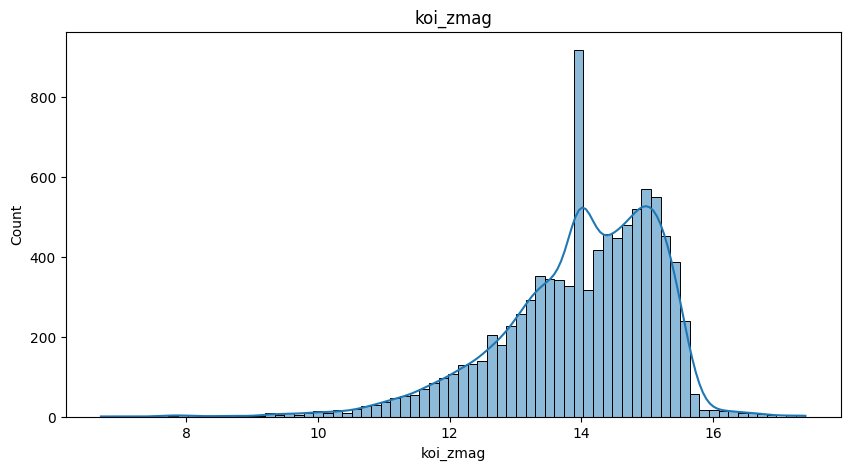

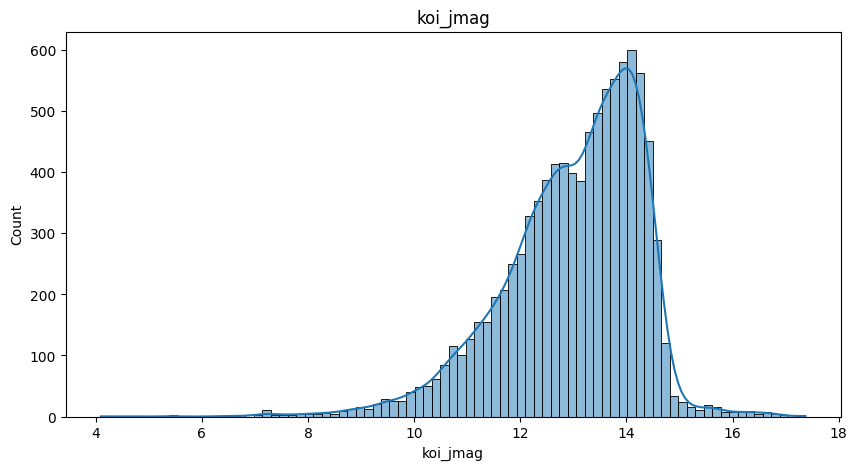

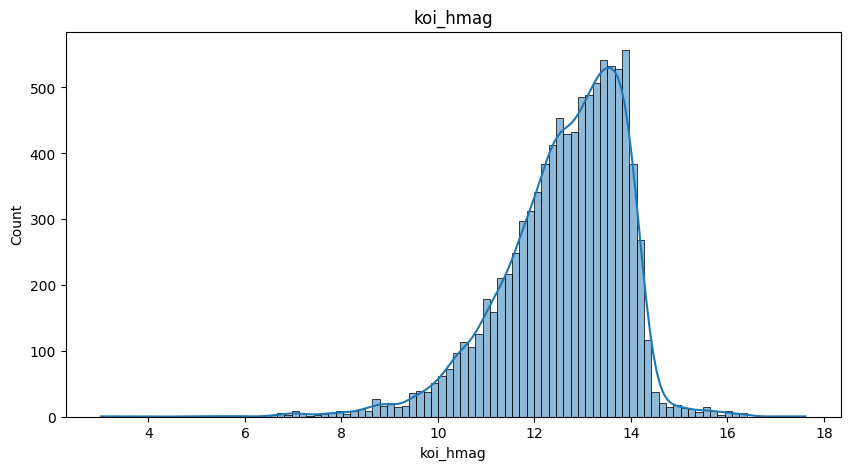

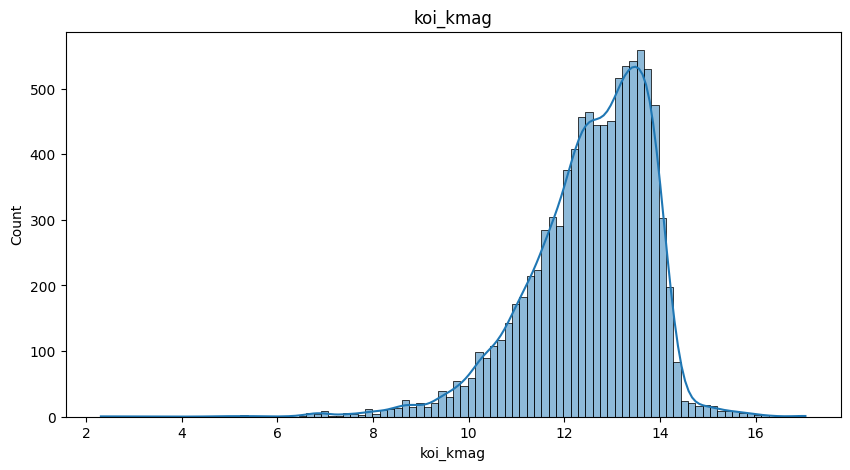

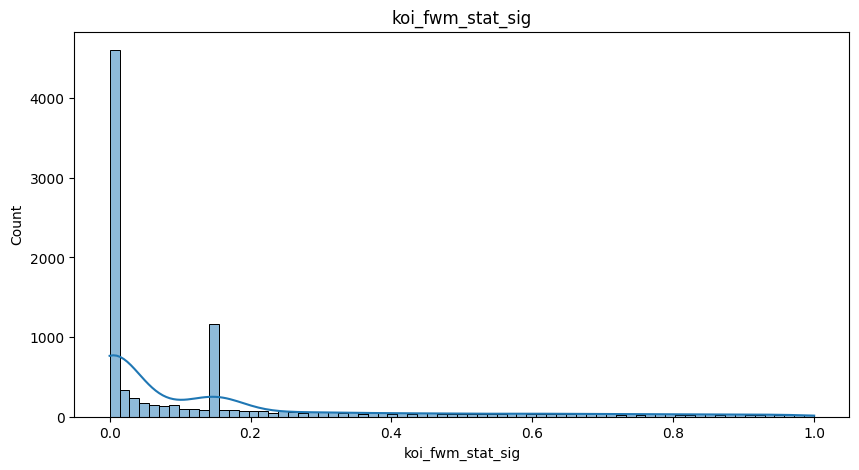

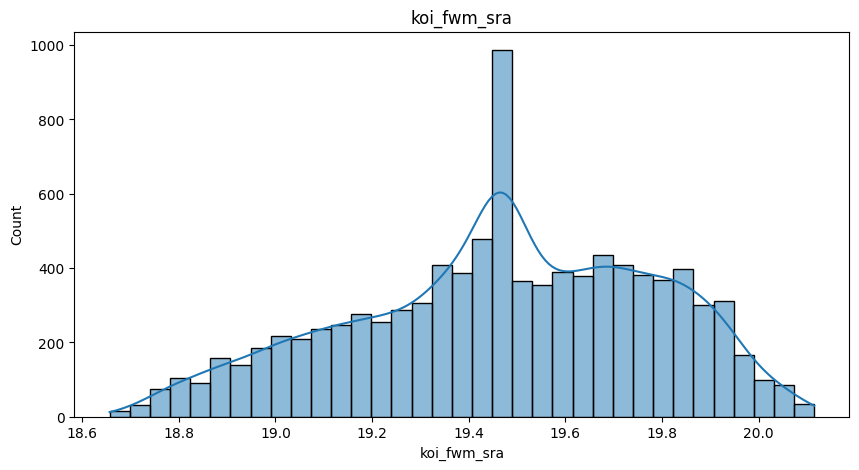

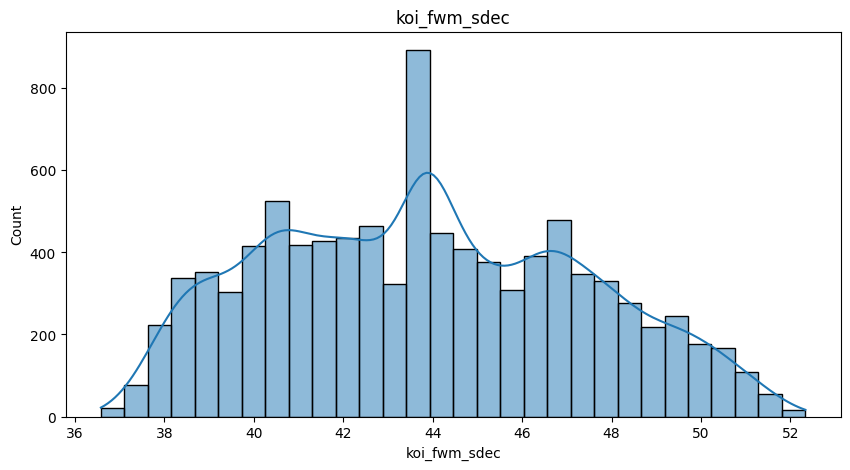

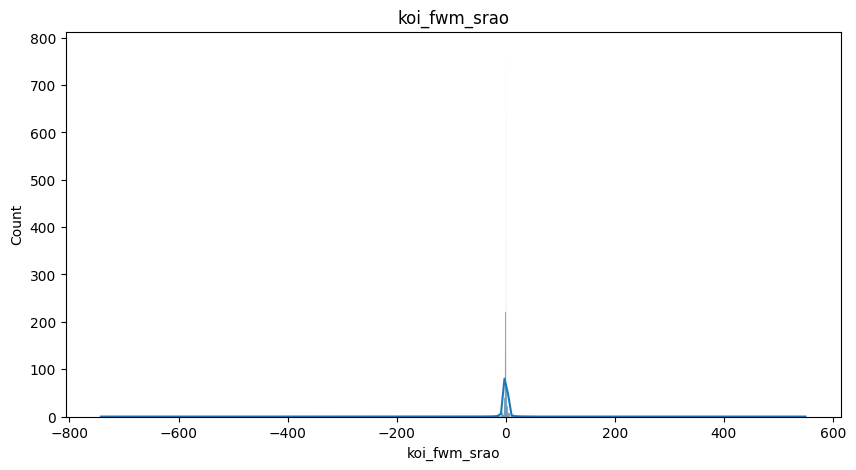

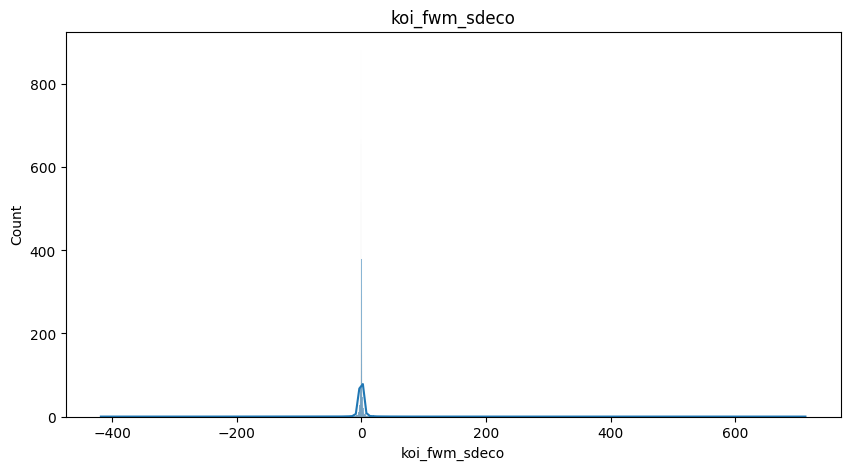

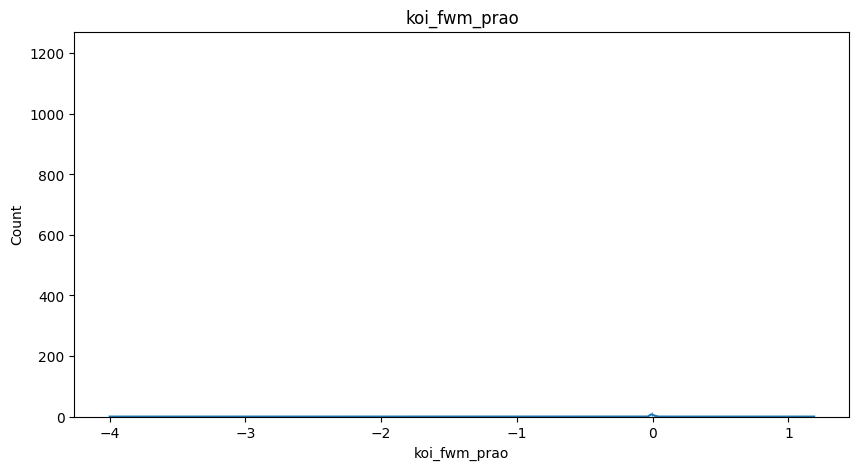

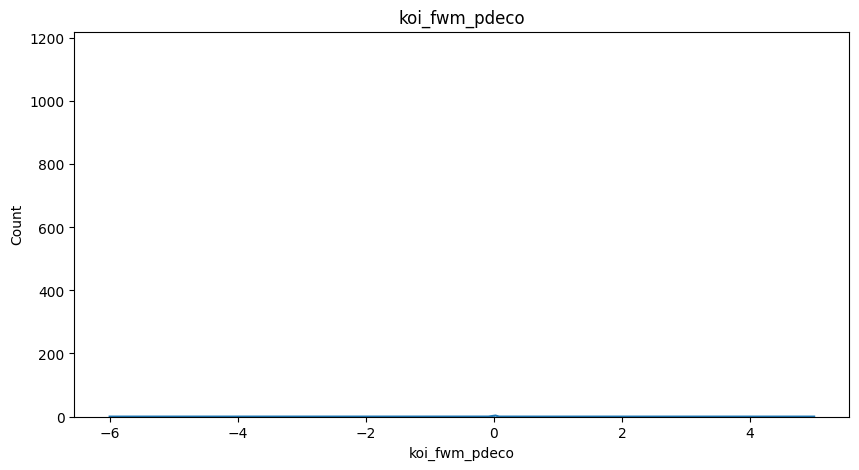

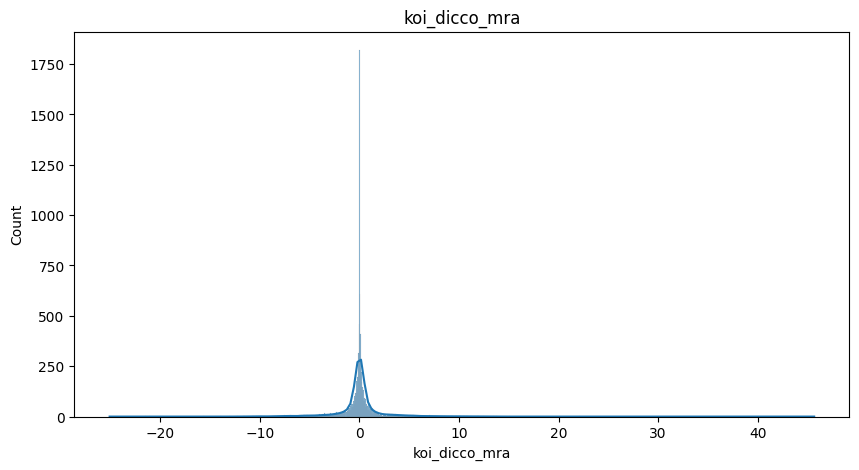

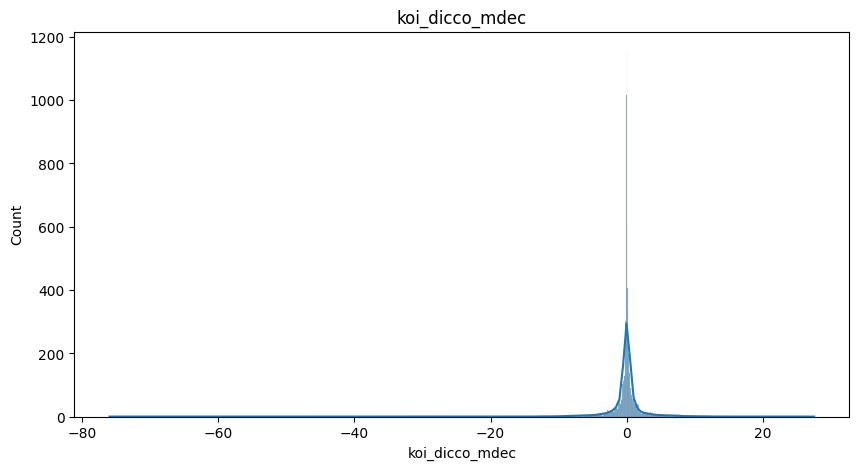

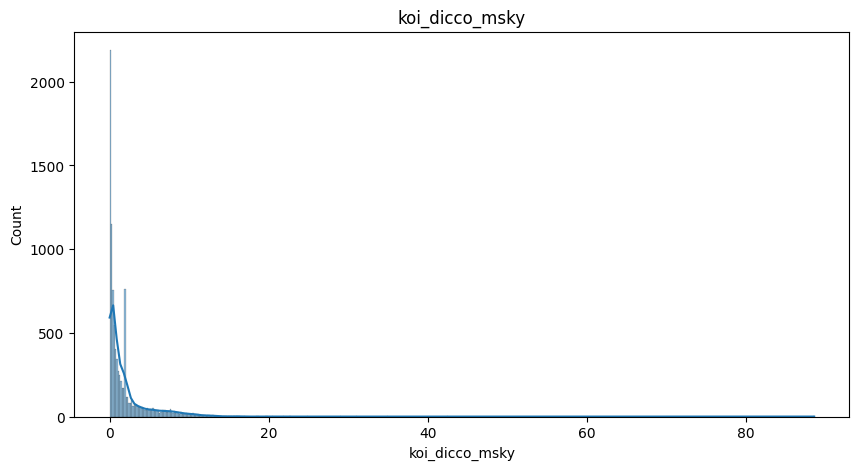

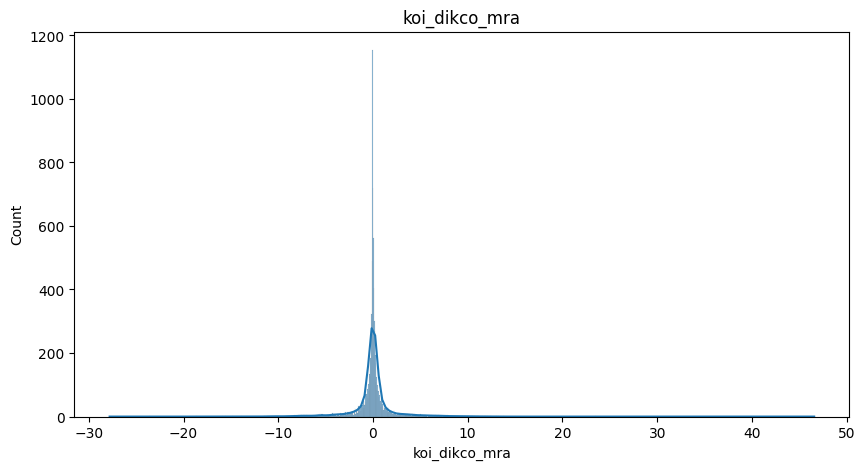

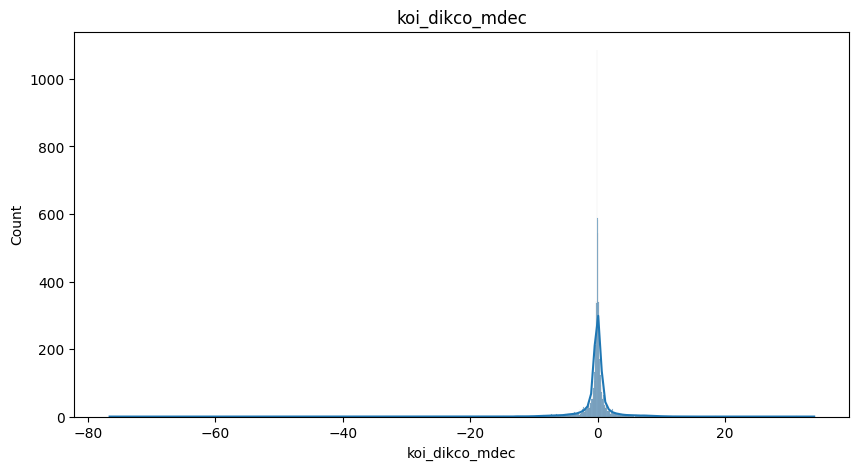

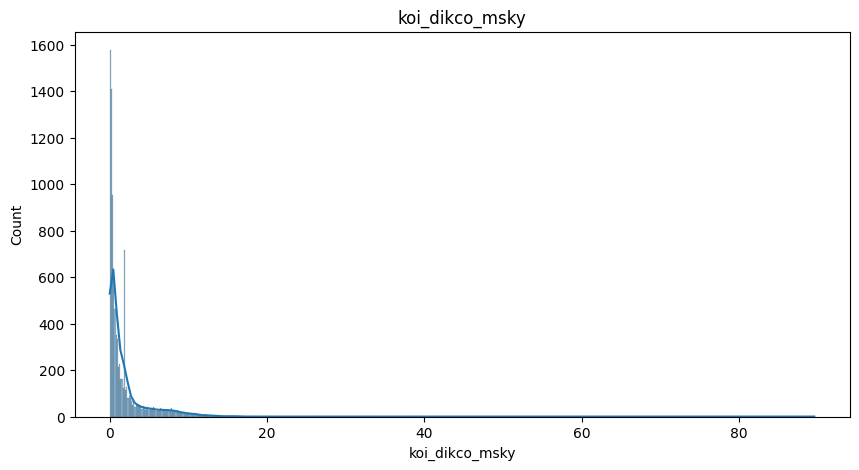

In [25]:
# distribution of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

In [48]:
# columns with single value
single_value_cols = df.columns[df.nunique() == 1]

In [49]:
single_value_cols

Index(['koi_eccen', 'koi_limbdark_mod', 'koi_ldm_coeff4', 'koi_ldm_coeff3'], dtype='object')

In [50]:
df.drop(single_value_cols, axis=1, inplace=True)

In [57]:
df.shape

(9564, 55)

Series([], Name: count, dtype: int64)

In [58]:
data_cleaned = df.copy()
data_cleaned.to_csv("../data/data_cleaned.csv", index=False)

In [59]:
data_cleaned.head()

,rowid,koi_disposition,koi_pdisposition,koi_period,koi_time0bk,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,CONFIRMED,CANDIDATE,9.488036,170.538750,2455003.539,0.146,2.95750,615.8,0.022344,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,CONFIRMED,CANDIDATE,54.418383,162.513840,2454995.514,0.586,4.50700,874.8,0.027954,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,CANDIDATE,CANDIDATE,19.899140,175.850252,2455008.850,0.969,1.78220,10829.0,0.154046,...,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,FALSE POSITIVE,FALSE POSITIVE,1.736952,170.307565,2455003.308,1.276,2.40641,8079.2,0.387394,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,CONFIRMED,CANDIDATE,2.525592,171.595550,2455004.596,0.701,1.65450,603.3,0.024064,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070


Text(0.5, 1.0, 'Distribution of target variable')

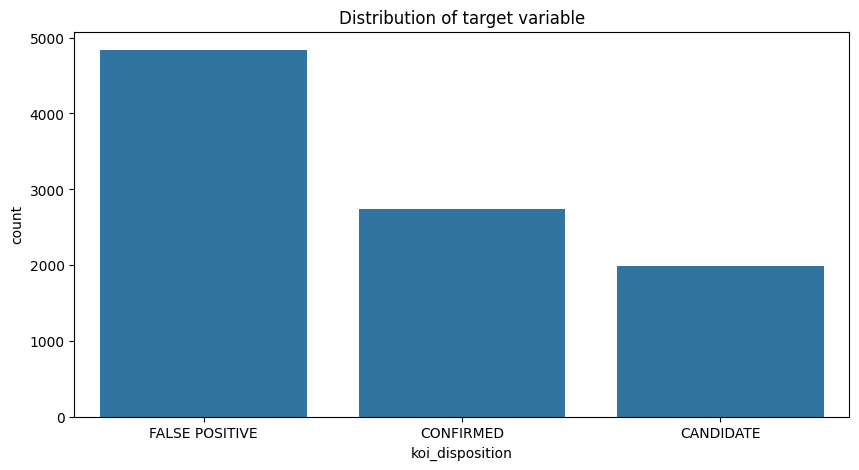

In [62]:
# plot for distribution of target variable
plt.figure(figsize=(10, 5))
sns.barplot(x=data_cleaned['koi_disposition'].value_counts().index, y=data_cleaned['koi_disposition'].value_counts())
plt.title('Distribution of target variable')